## Kaggle Machine Learning & Data Science Survey Ext

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the data
df = pd.read_csv('kaggle_2017_to_2020.csv', low_memory = False)

In [3]:
# Print the information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80327 entries, 0 to 80326
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unique_Id                           80327 non-null  int64 
 1   Time                                80327 non-null  object
 2   Year                                80327 non-null  int64 
 3   Age                                 80327 non-null  object
 4   Gender                              80327 non-null  object
 5   Country                             80327 non-null  object
 6   Degree                              80327 non-null  object
 7   Job Title                           80327 non-null  object
 8   Company Size                        80327 non-null  object
 9   Team Size                           80327 non-null  object
 10  ML Status in Company                80327 non-null  object
 11  Compensation Status                 80327 non-null  ob

In [4]:
# Display first five rows
df.head()

,Unique_Id,Time,Year,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),Specialised HW,TPU Usage,ML Methods experience (in years)
0,0,Unknown / Not Specified,2017,25.0,Male,Argentina,Master’s degree,Machine Learning Engineer,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,"Basic laptop (Macbook),Traditional Workstation",Unknown / Not Specified,Unknown / Not Specified
1,1,Unknown / Not Specified,2017,21.0,Prefer not to say,Argentina,No formal education past high school,Business Analyst,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified
2,2,Unknown / Not Specified,2017,25.0,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,"20,001-30,000",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified
3,3,Unknown / Not Specified,2017,28.0,Male,Argentina,Bachelor’s degree,Other,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Other,Unknown / Not Specified,Unknown / Not Specified
4,4,Unknown / Not Specified,2017,38.0,Male,Argentina,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified


In [5]:
# Check for missing values
df.isnull().sum()

Unique_Id                             0
Time                                  0
Year                                  0
Age                                   0
Gender                                0
Country                               0
Degree                                0
Job Title                             0
Company Size                          0
Team Size                             0
ML Status in Company                  0
Compensation Status                   0
Money Spent                           0
Current role experience (in years)    0
Programming language choice           0
Recommend Programming language        0
Coding experience (in years)          0
Specialised HW                        0
TPU Usage                             0
ML Methods experience (in years)      0
dtype: int64

In [6]:
# Select the columns to drop
columns_to_drop = ['Unique_Id','Time','Specialised HW']

In [7]:
# Drop the columns
df.drop(columns = columns_to_drop, inplace =True )

In [8]:
# Find how many entries with unknown comensation are missing
df['Compensation Status'].describe()

count                       80327
unique                         19
top       Unknown / Not Specified
freq                        20201
Name: Compensation Status, dtype: object

In [9]:
# Find unique values
df['Compensation Status'].unique()

array(['Cant Disclose', '20,001-30,000', '40,000-49,999', '> $500,000',
       '50,000-59,999', '10,001-20,000', '30,000-39,999',
       '300,000-500,000', '100,000-124,999', '200,000-249,999',
       '60,000-69,999', '80,000-89,999', '70,000-79,999',
       '125,000-149,999', '150,000-199,999', '250,000-299,999',
       '90,000-99,999', '0-10,000', 'Unknown / Not Specified'],
      dtype=object)

In [90]:
# Keep only entries with known compensations
filtered_df = df[df['Compensation Status'] != 'Unknown / Not Specified']
filtered_df = filtered_df[filtered_df['Compensation Status'] != 'Cant Disclose']

In [91]:
# print filtered df
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43860 entries, 2 to 80325
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                43860 non-null  int64 
 1   Age                                 43860 non-null  object
 2   Gender                              43860 non-null  object
 3   Country                             43860 non-null  object
 4   Degree                              43860 non-null  object
 5   Job Title                           43860 non-null  object
 6   Company Size                        43860 non-null  object
 7   Team Size                           43860 non-null  object
 8   ML Status in Company                43860 non-null  object
 9   Compensation Status                 43860 non-null  object
 10  Money Spent                         43860 non-null  object
 11  Current role experience (in years)  43860 non-null  ob

### About 40,000 entries were removed

In [92]:
# Check the type of education present in the survey
filtered_df['Degree'].unique()

array(['Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'Master’s degree', 'Professional degree', 'Doctoral degree',
       'Unknown / Not Specified', 'No formal education past high school',
       'I prefer not to answer'], dtype=object)

In [93]:
# Remove the unknown values from education column
filtered_df = filtered_df[filtered_df['Degree'] != 'Unknown / Not Specified']

In [94]:
# Check filtered df
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43854 entries, 2 to 80325
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                43854 non-null  int64 
 1   Age                                 43854 non-null  object
 2   Gender                              43854 non-null  object
 3   Country                             43854 non-null  object
 4   Degree                              43854 non-null  object
 5   Job Title                           43854 non-null  object
 6   Company Size                        43854 non-null  object
 7   Team Size                           43854 non-null  object
 8   ML Status in Company                43854 non-null  object
 9   Compensation Status                 43854 non-null  object
 10  Money Spent                         43854 non-null  object
 11  Current role experience (in years)  43854 non-null  ob

### About 2000 entries were removed

In [95]:
# Change the age column format to remove ranges and find the average
def parse_age(age):
    if '-' in age:
        low, high = age.replace(',', '').split('-')
    elif '>' in age:
        # Extract the numeric part after '>'
        low = age.replace(',', '').strip()
    else:
        # Handle other cases if needed
        low = high = age

    return pd.Series([low, high], index=['Low Age', 'High Age'])

# Apply the function to the 'Compensation Status' column
filtered_df[['Low Age', 'High Age']] = filtered_df['Age'].apply(parse_age)

# Convert 'Low Range' and 'High Range' to numeric types (floats or ints)
filtered_df['Low Age'] = pd.to_numeric(filtered_df['Low Age'], errors='coerce')
filtered_df['High Age'] = pd.to_numeric(filtered_df['High Age'], errors='coerce')

In [96]:
# Calculate the average of low and high range age
filtered_df['Average Age'] = (filtered_df['Low Age'] +  filtered_df['High Age']) / 2

In [97]:
# Drop the other age related column and keep average only
filtered_df = filtered_df.drop(columns = ['Age', 'Low Age', 'High Age'])

In [98]:
# Parse the compensation column to split between low and high range salaries
def parse_compensation(comp_range):
    if '-' in comp_range:
        low, high = comp_range.replace('$', '').replace(',', '').split('-')
    elif '>' in comp_range:
        # Extract the numeric part after '>'
        low = comp_range.replace('>', '').replace('$', '').replace(',', '').strip()
        high = None  # Set high range to None or you can use np.nan
    else:
        # Handle other cases if needed
        low = high = None

    return pd.Series([low, high], index=['Low Range Comp', 'High Range Comp'])

# Apply the function to the 'Compensation Status' column
filtered_df[['Low Range Comp', 'High Range Comp']] = filtered_df['Compensation Status'].apply(parse_compensation)

# Convert 'Low Range' and 'High Range' to numeric types (floats or ints)
filtered_df['Low Range Comp'] = pd.to_numeric(filtered_df['Low Range Comp'], errors='coerce')
filtered_df['High Range Comp'] = pd.to_numeric(filtered_df['High Range Comp'], errors='coerce')

In [99]:
filtered_df['Average Comp'] = (filtered_df['Low Range Comp'] +  filtered_df['High Range Comp']) / 2

In [100]:
filtered_df = filtered_df.drop(columns = 'Compensation Status')

In [101]:
filtered_df.head(10)

,Year,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),TPU Usage,ML Methods experience (in years),Average Age,Low Range Comp,High Range Comp,Average Comp
2,2017,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,25.0,20001,30000.0,25000.5
7,2017,Male,Argentina,Some college/university study without earning ...,Business Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,50.0,40000,49999.0,44999.5
9,2017,Male,Argentina,Master’s degree,Data Scientist,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,36.0,500000,NaN,NaN
12,2017,Male,Argentina,Some college/university study without earning ...,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,27.0,40000,49999.0,44999.5
13,2017,Male,Argentina,Bachelor’s degree,Data Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,32.0,50000,59999.0,54999.5
16,2017,Male,Argentina,Bachelor’s degree,Business Analyst,"1000-9,999 employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,SQL,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,26.0,10001,20000.0,15000.5
19,2017,Male,Argentina,Professional degree,Machine Learning Engineer,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,39.0,500000,NaN,NaN
20,2017,Female,Argentina,Master’s degree,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,33.0,30000,39999.0,34999.5
21,2017,Male,Argentina,Master’s degree,Data Scientist,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,39.0,500000,NaN,NaN
22,2017,Male,Argentina,Master’s degree,Software Developer/Software Engineer,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,37.0,300000,500000.0,400000.0


In [102]:
# Fill the missing average comp value with low range comp.
filtered_df['Average Comp'] = filtered_df['Average Comp'].fillna(filtered_df['Low Range Comp'])  
filtered_df['High Range Comp'] = filtered_df['High Range Comp'].fillna(filtered_df['Low Range Comp'])  

In [103]:
# Display first 10 rows 
filtered_df.head(10)

,Year,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),TPU Usage,ML Methods experience (in years),Average Age,Low Range Comp,High Range Comp,Average Comp
2,2017,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,25.0,20001,30000.0,25000.5
7,2017,Male,Argentina,Some college/university study without earning ...,Business Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,50.0,40000,49999.0,44999.5
9,2017,Male,Argentina,Master’s degree,Data Scientist,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,36.0,500000,500000.0,500000.0
12,2017,Male,Argentina,Some college/university study without earning ...,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,27.0,40000,49999.0,44999.5
13,2017,Male,Argentina,Bachelor’s degree,Data Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,32.0,50000,59999.0,54999.5
16,2017,Male,Argentina,Bachelor’s degree,Business Analyst,"1000-9,999 employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,SQL,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,26.0,10001,20000.0,15000.5
19,2017,Male,Argentina,Professional degree,Machine Learning Engineer,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,39.0,500000,500000.0,500000.0
20,2017,Female,Argentina,Master’s degree,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,33.0,30000,39999.0,34999.5
21,2017,Male,Argentina,Master’s degree,Data Scientist,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,39.0,500000,500000.0,500000.0
22,2017,Male,Argentina,Master’s degree,Software Developer/Software Engineer,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,37.0,300000,500000.0,400000.0


## EDA

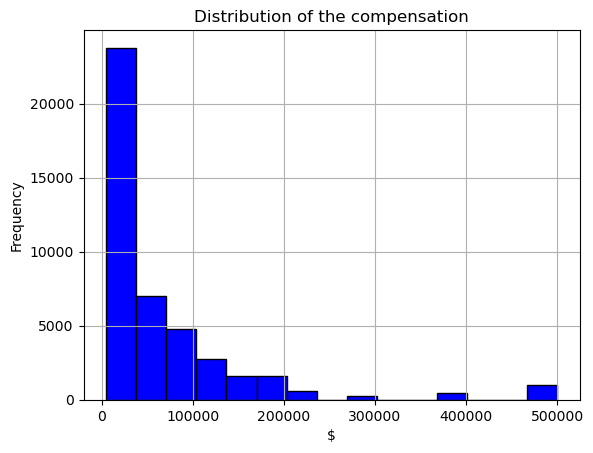

In [24]:
plt.hist(filtered_df["Average Comp"], bins=15, edgecolor='black', color='blue')
plt.title('Distribution of the compensation')
plt.xlabel('$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
# Filter out high salary outliers
filtered_df = filtered_df[filtered_df['Average Comp'] < 300000]

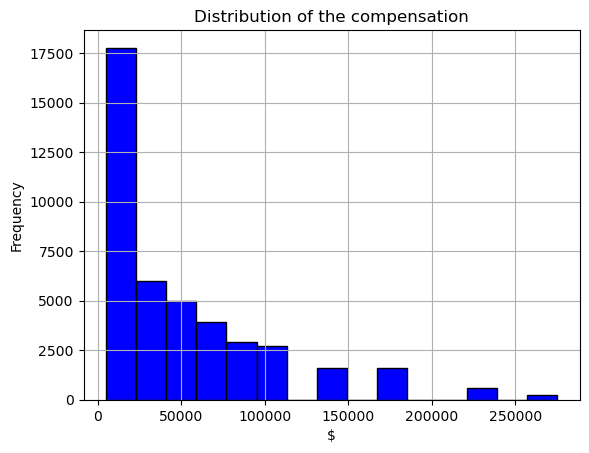

In [26]:
plt.hist(filtered_df["Average Comp"], bins=15, edgecolor='black', color='blue')
plt.title('Distribution of the compensation')
plt.xlabel('$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

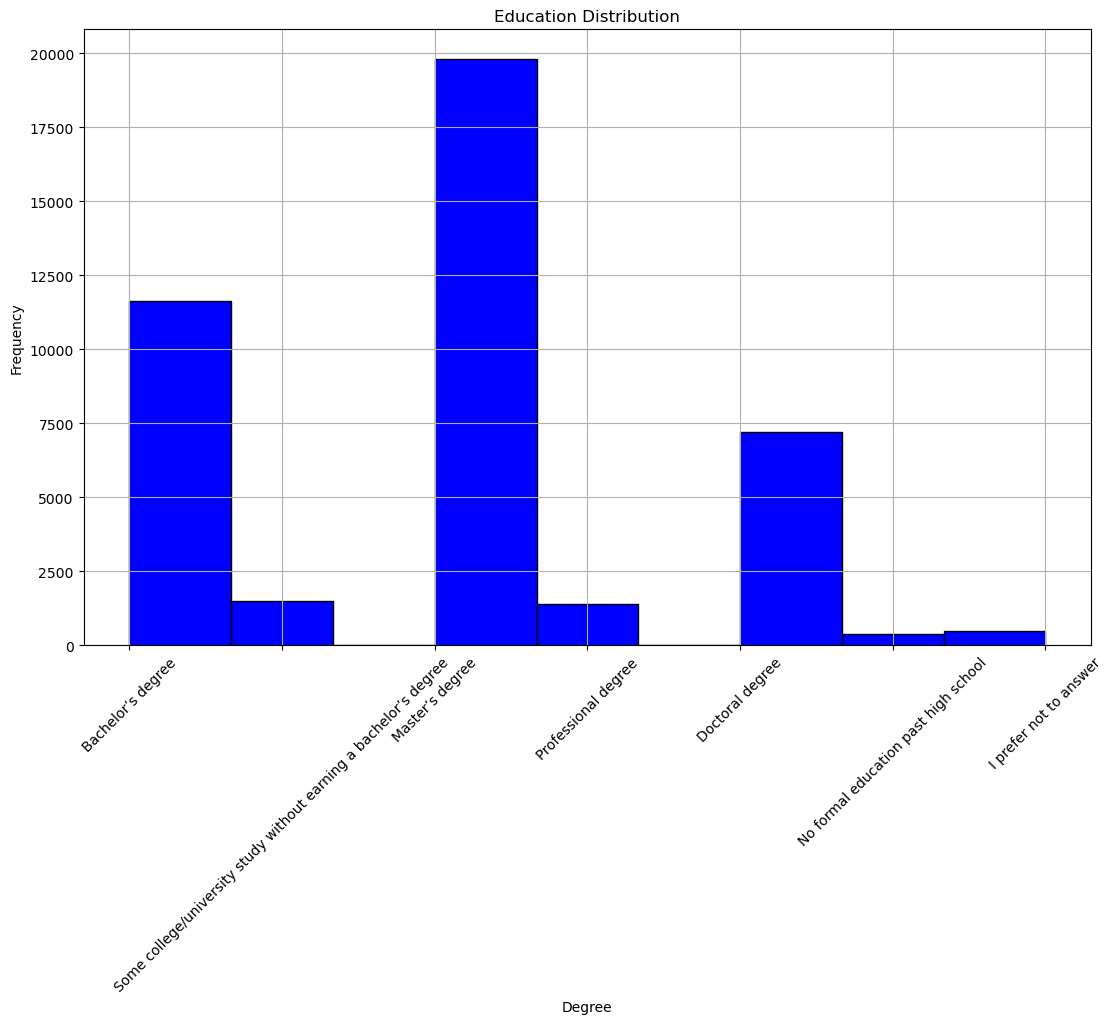

In [27]:
plt.figure(figsize = (13,8))
plt.hist(filtered_df["Degree"], bins=9, edgecolor='black', color='blue')
plt.title('Education Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

## Split by formal and non formal education

In [28]:
df_no_educ = filtered_df[filtered_df['Degree'] == 'Some college/university study without earning a bachelor’s degree']

In [29]:
df_educ = filtered_df[filtered_df['Degree'] != 'Some college/university study without earning a bachelor’s degree']

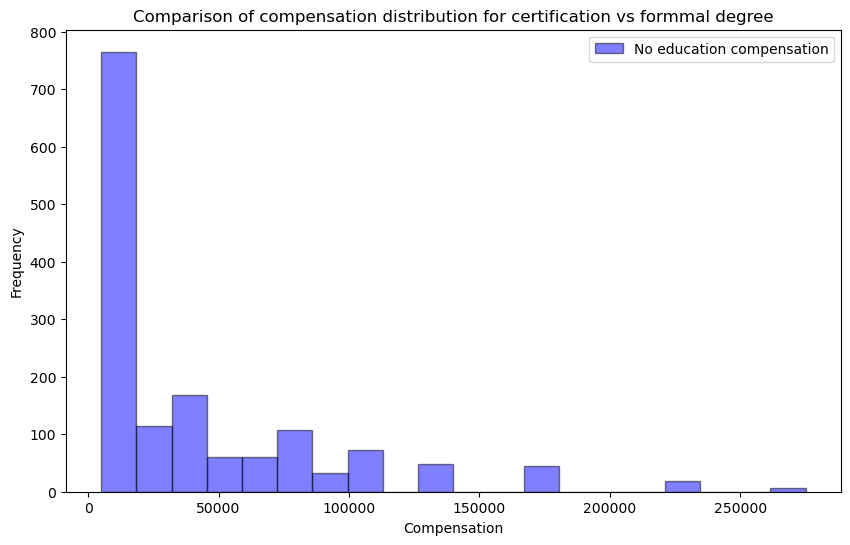

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_educ['Average Comp'], bins=20, alpha=0.5, label='No education compensation', color='blue', edgecolor='black')

plt.title("Comparison of compensation distribution for certification vs formmal degree")
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.legend()

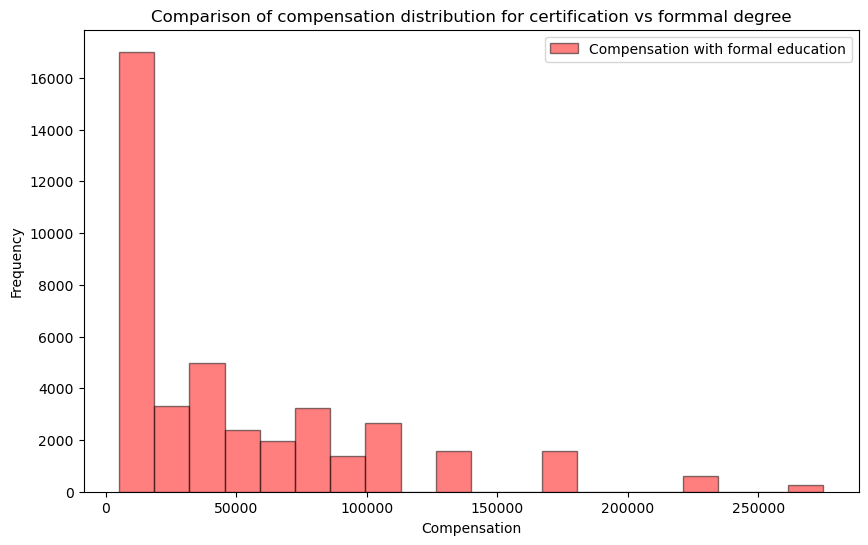

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df_educ['Average Comp'], bins=20, alpha=0.5, label='Compensation with formal education', color='red', edgecolor='black')
plt.title("Comparison of compensation distribution for certification vs formmal degree")
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


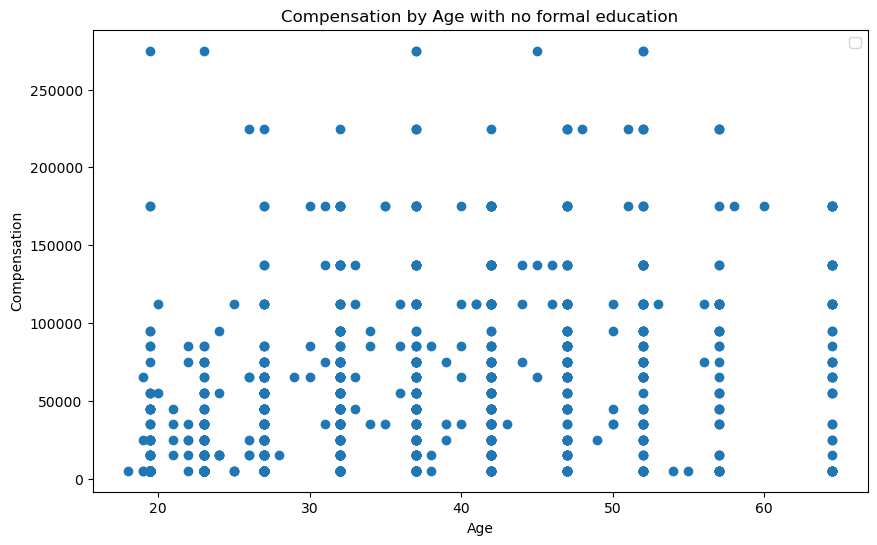

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_educ['Average Age'], df_no_educ['Average Comp'])
plt.title('Compensation by Age with no formal education')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


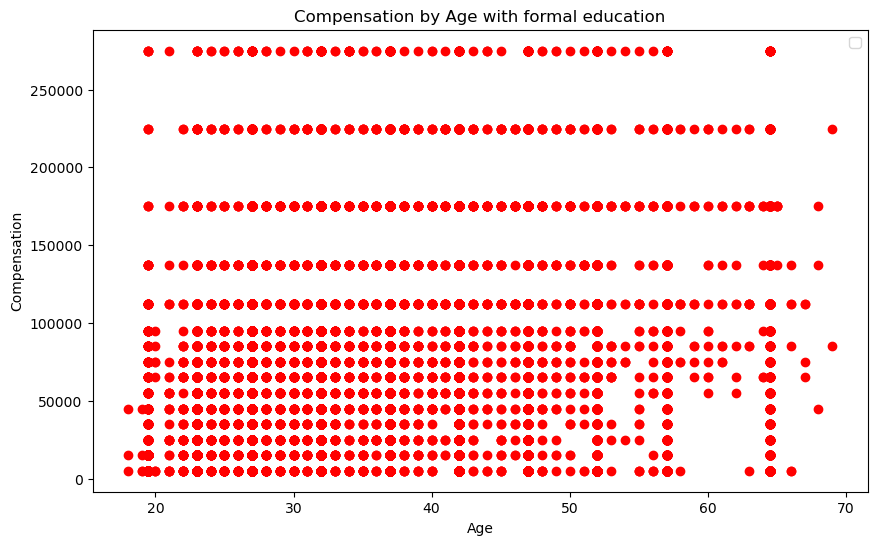

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df_educ['Average Age'], df_educ['Average Comp'], color = 'red')
plt.title('Compensation by Age with formal education')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


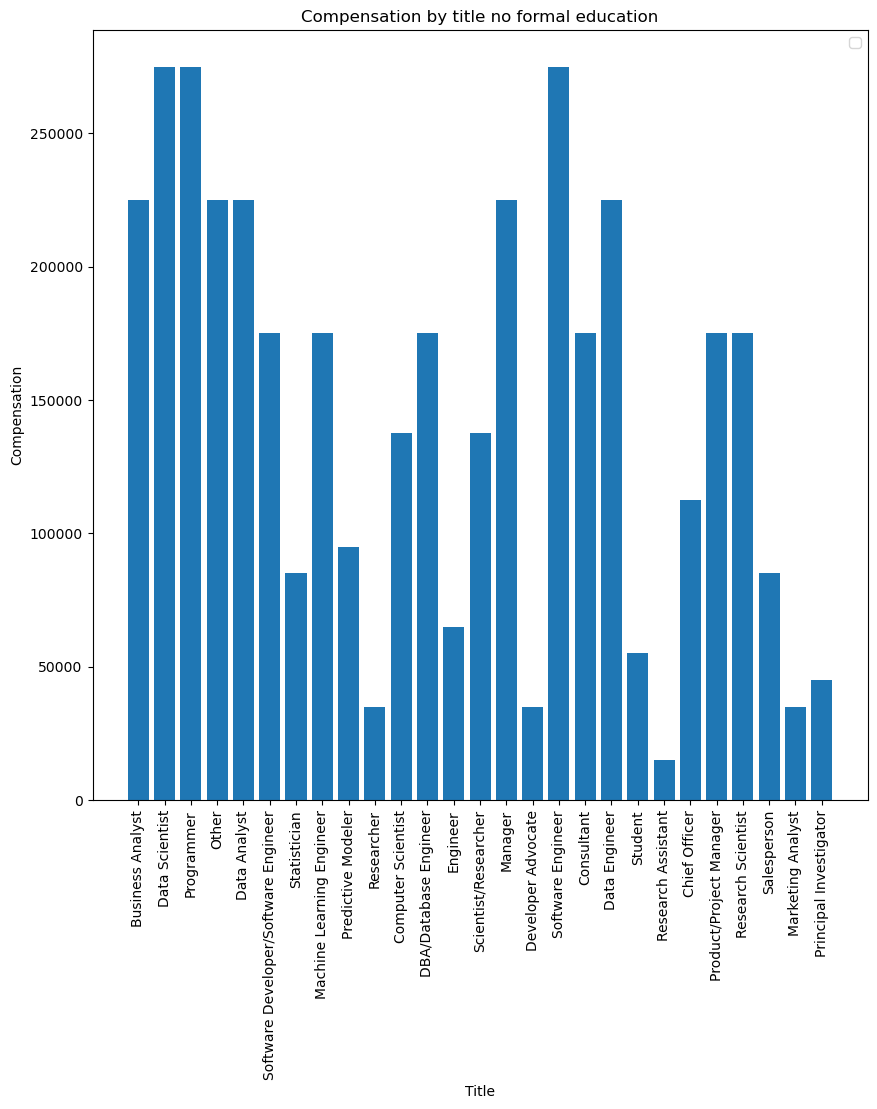

In [34]:
plt.figure(figsize=(10, 10))
plt.bar(df_no_educ['Job Title'], df_no_educ['Average Comp'])
plt.title('Compensation by title no formal education')
plt.xlabel('Title')
plt.ylabel('Compensation')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


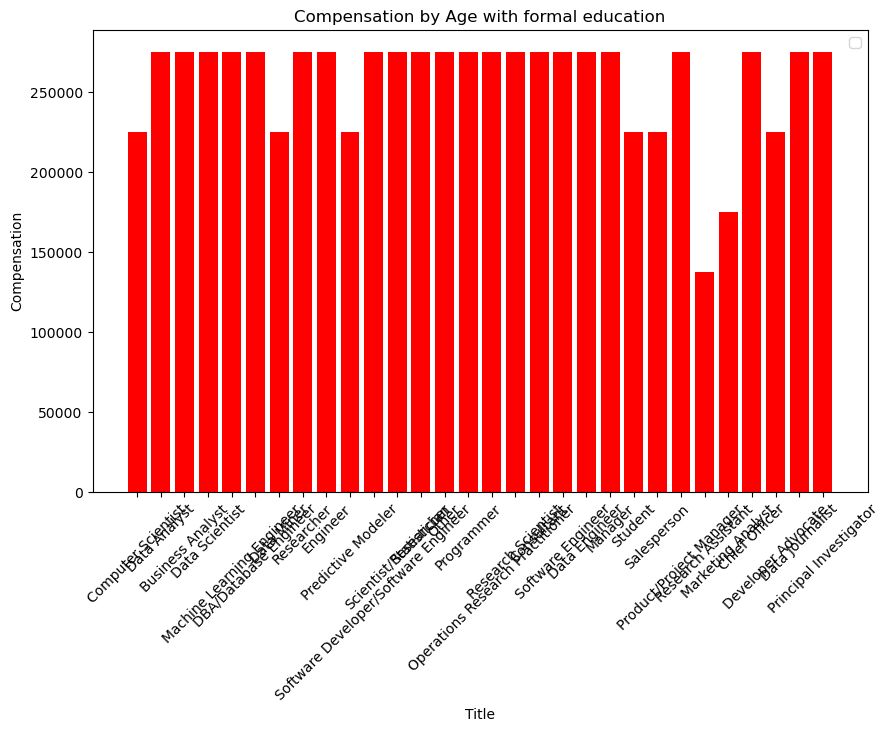

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(df_educ['Job Title'], df_educ['Average Comp'], color = 'red')
plt.title('Compensation by Age with formal education')
plt.xlabel('Title')
plt.ylabel('Compensation')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

### Average compensation by Gender

In [36]:
# Subset the data by gender and compensation
gender_df = filtered_df[['Gender', 'Average Comp']]
                         

In [37]:
# Group the data by gender and calculate mean salary
gender_df = gender_df.groupby('Gender').mean()

In [39]:
# Print the subseted data
gender_df

,Average Comp
Gender,
Female,42776.444067
Male,51031.261815
Nonbinary,84344.892857
Prefer not to say,54965.268433
Prefer to self-describe,50578.773684
Unknown / Not Specified,89999.500000


In [40]:
# Reset the index
gender_df = gender_df.reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


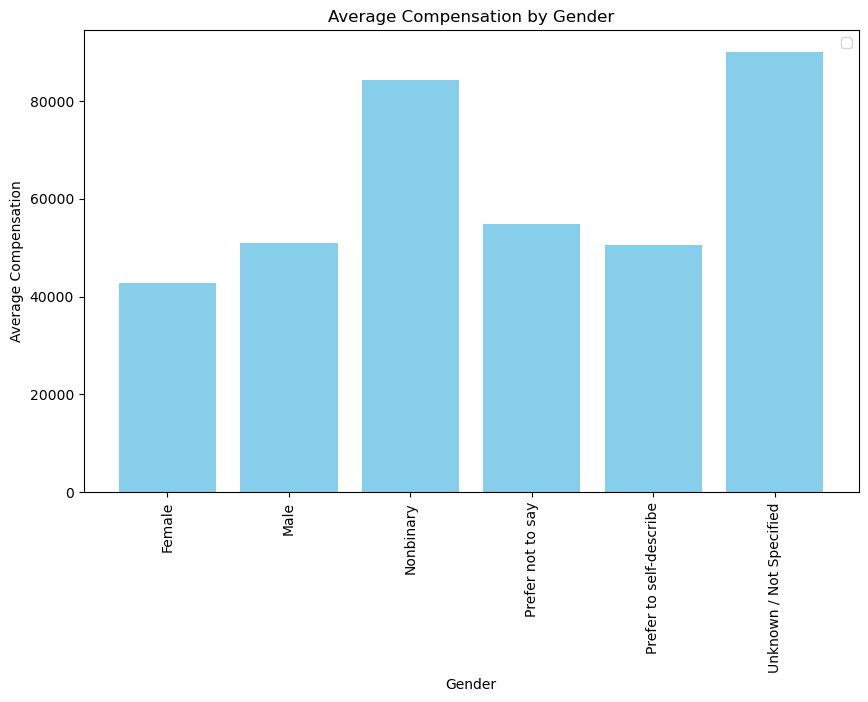

In [41]:
# Build a bar graph
plt.figure(figsize=(10, 6))
plt.bar(gender_df['Gender'], gender_df['Average Comp'], color = 'skyblue')
plt.title('Average Compensation by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Compensation')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Average compensation by Country

In [42]:
# Subset the data by country and compensation
country_df = filtered_df[['Country', 'Average Comp']]

In [43]:
# Group the data by country and calculate mean salary
country_df = country_df.groupby('Country').mean()

In [44]:
# Print the subseted data
country_df.head(20)

,Average Comp
Country,
Algeria,7500.055556
Argentina,23741.837748
Australia,93969.966150
Austria,51737.500000
Bangladesh,9437.550000
Belarus,20111.506369
Belgium,53939.101010
Brazil,29814.139988
Canada,72508.874769


In [45]:
# Reset the index
country_df = country_df.reset_index()

In [46]:
country_df = country_df.sort_values(by = 'Average Comp')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


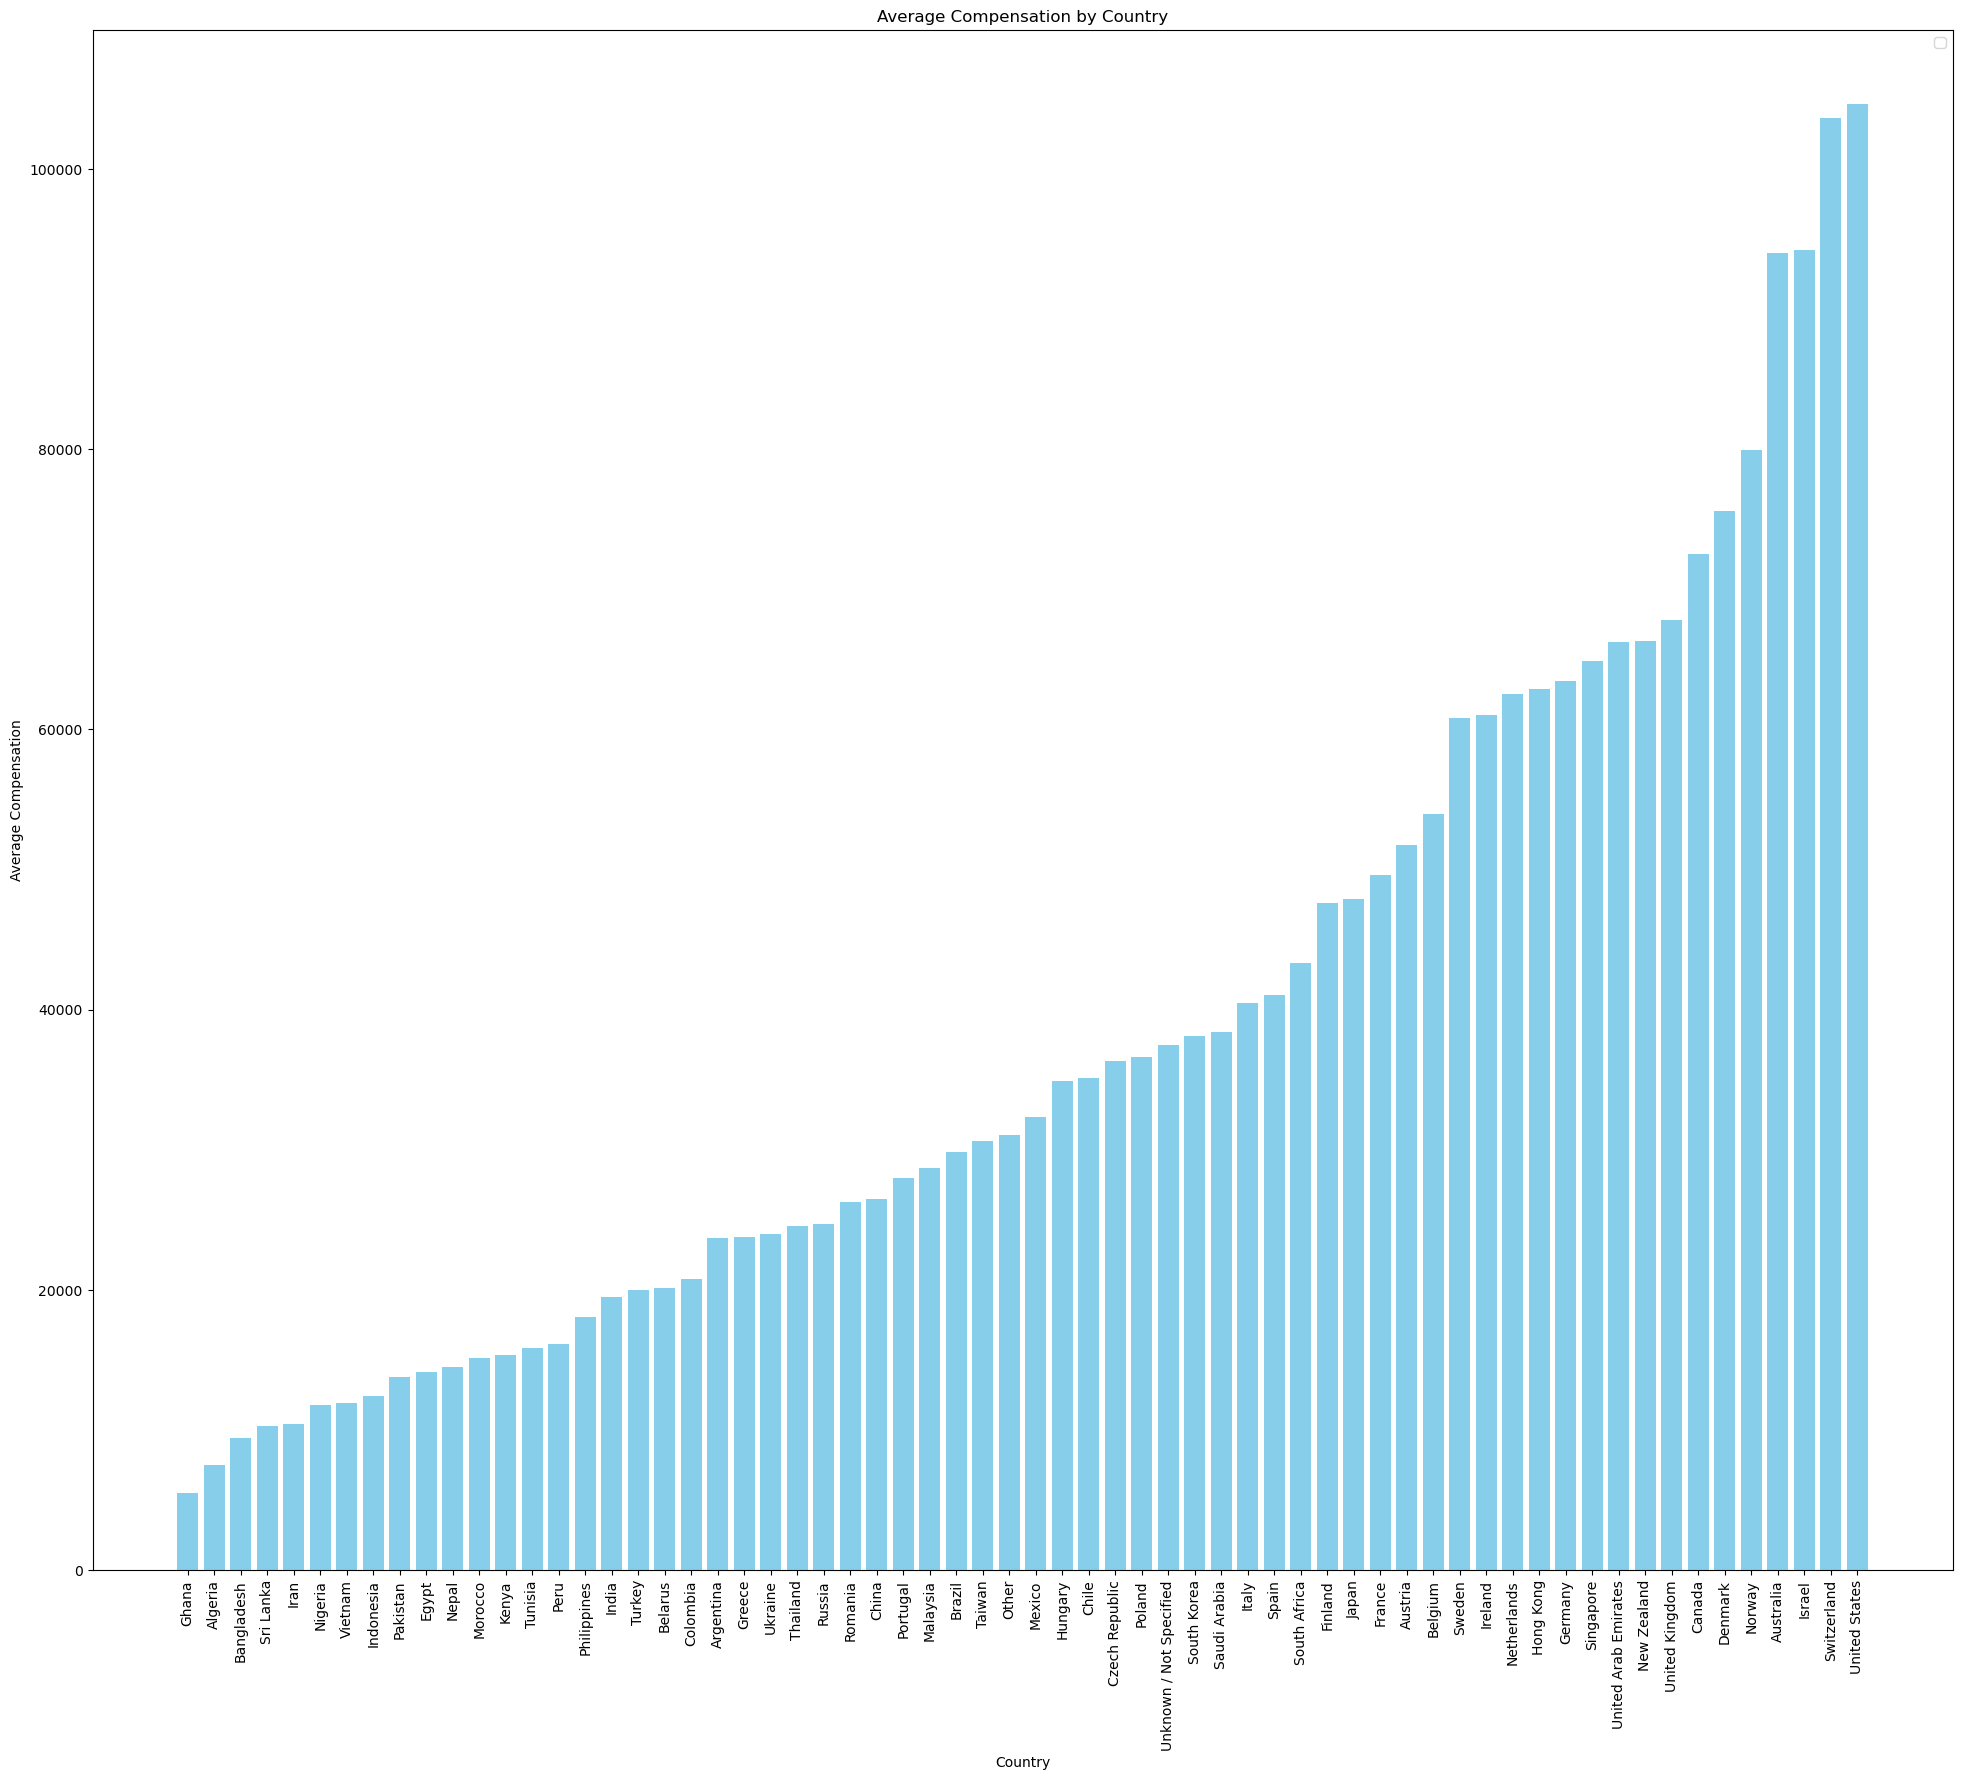

In [47]:
# Build a bar graph
plt.figure(figsize=(24, 20))
plt.bar(country_df['Country'], country_df['Average Comp'], color = 'skyblue')
plt.title('Average Compensation by Country')
plt.xlabel('Country')
plt.ylabel('Average Compensation')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Average compensation by Job Title

In [48]:
# Subset the data by job_title and compensation
title_df = filtered_df[['Job Title', 'Average Comp']]

In [49]:
# Group the data by country and calculate mean salary
title_df = title_df.groupby('Job Title').mean()

In [50]:
# Print the subseted data
title_df

,Average Comp
Job Title,
Business Analyst,43942.446312
Chief Officer,97368.129386
Computer Scientist,61707.678218
Consultant,67654.063492
DBA/Database Engineer,50487.074246
Data Analyst,39322.196225
Data Engineer,50224.791752
Data Journalist,73249.950000
Data Miner,71950.865854


In [51]:
title_df = title_df.reset_index().sort_values(by = 'Average Comp')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


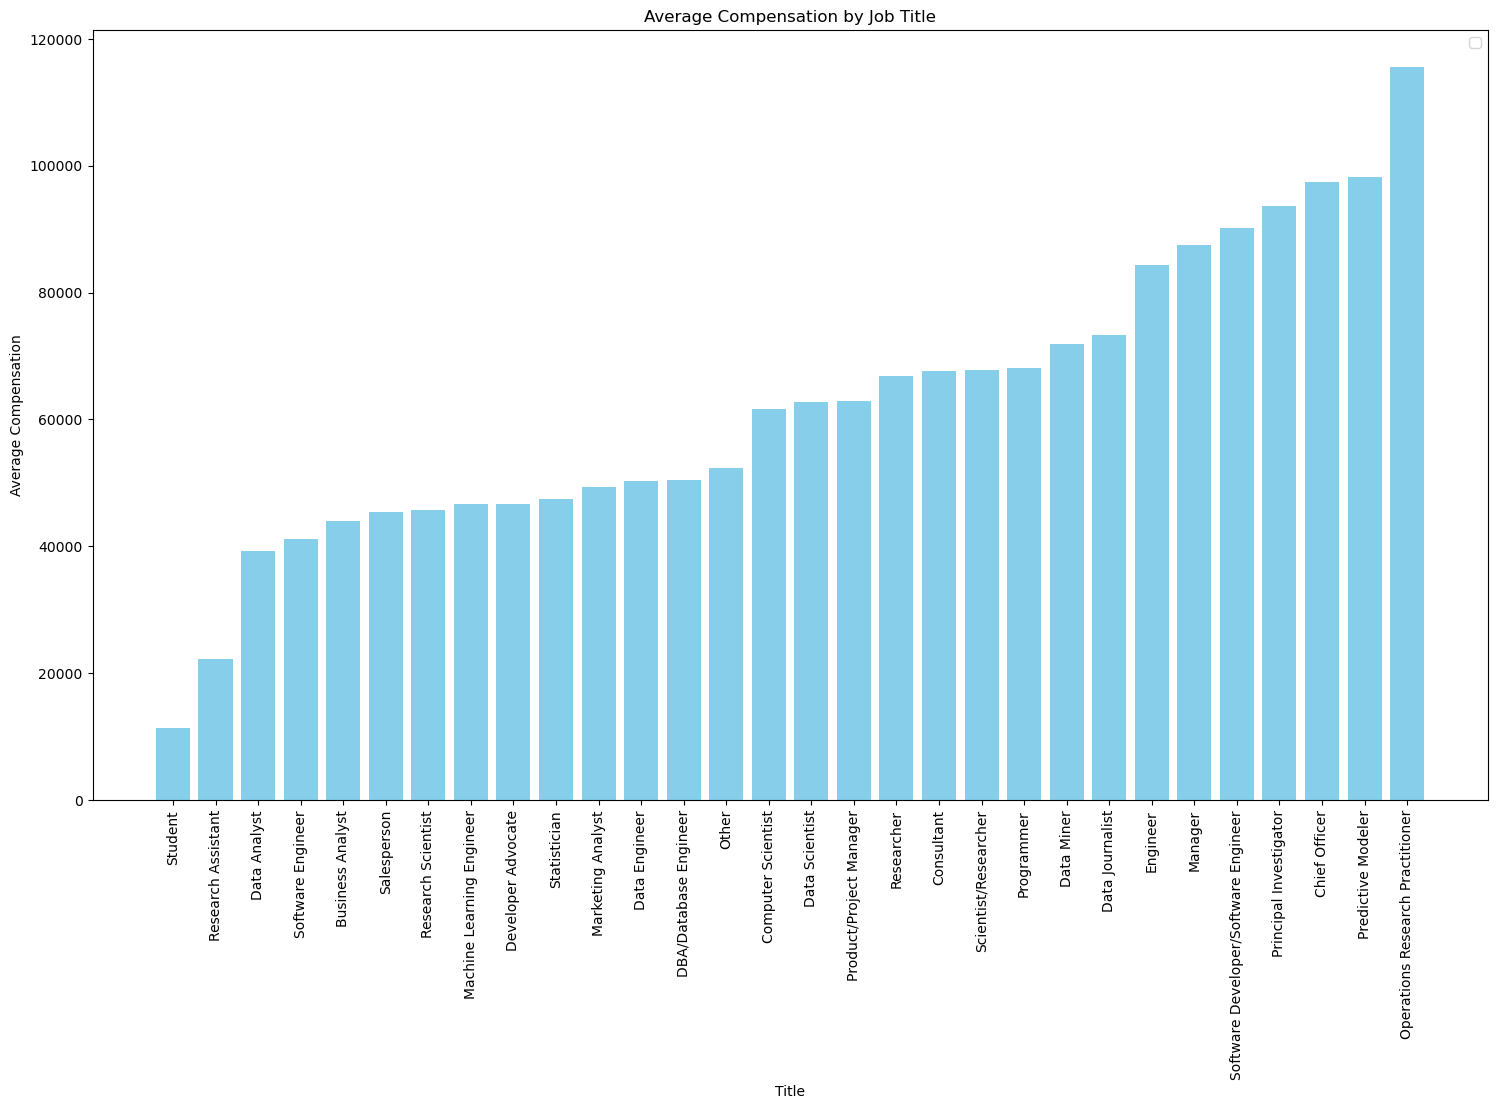

In [52]:
# Build a bar graph
plt.figure(figsize=(18, 10))
plt.bar(title_df['Job Title'], title_df['Average Comp'], color = 'skyblue')
plt.title('Average Compensation by Job Title')
plt.xlabel('Title')
plt.ylabel('Average Compensation')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### Average compensation by Job Title split by formal and informal udecation

In [56]:
df_no_educ.head()
df_educ.head()

,Year,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),TPU Usage,ML Methods experience (in years),Average Age,Low Range Comp,High Range Comp,Average Comp
2,2017,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,25.0,20001,30000.0,25000.5
13,2017,Male,Argentina,Bachelor’s degree,Data Analyst,"10,000 or more employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,32.0,50000,59999.0,54999.5
16,2017,Male,Argentina,Bachelor’s degree,Business Analyst,"1000-9,999 employees",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,SQL,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,26.0,10001,20000.0,15000.5
20,2017,Female,Argentina,Master’s degree,Data Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,33.0,30000,39999.0,34999.5
26,2017,Male,Argentina,Professional degree,Data Scientist,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,R,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,55.0,100000,124999.0,112499.5


In [57]:
# Subset the data by job_title and compensation
title_df_educ = df_educ[['Job Title', 'Average Comp']]

In [58]:
# Subset the data by job_title and compensation
title_df_no_educ = df_no_educ[['Job Title', 'Average Comp']]

In [59]:
title_df_educ = title_df_educ.groupby('Job Title').mean()
title_df_no_educ = title_df_no_educ.groupby('Job Title').mean()

In [60]:
title_df_educ = title_df_educ.sort_values(by = 'Average Comp').reset_index()
title_df_no_educ = title_df_no_educ.sort_values(by = 'Average Comp').reset_index()

In [61]:
title_df_educ

,Job Title,Average Comp
0,Student,11675.300000
1,Research Assistant,22568.853211
2,Data Analyst,39512.750228
3,Software Engineer,40740.080502
4,Business Analyst,44135.136715
5,Research Scientist,45759.792298
6,Salesperson,46725.253521
7,Machine Learning Engineer,46835.790901
8,Statistician,48215.982581
9,Marketing Analyst,49852.782353


In [62]:
title_df_no_educ

,Job Title,Average Comp
0,Research Assistant,7222.333333
1,Student,7263.171053
2,Statistician,14444.500000
3,Developer Advocate,15000.187500
4,Researcher,22500.250000
5,Marketing Analyst,30000.000000
6,Salesperson,32142.785714
7,Data Analyst,34345.107143
8,Research Scientist,38333.250000
9,Business Analyst,38402.597222


In [63]:
unique_values = title_df_educ['Job Title'][~title_df_educ['Job Title'].isin(title_df_no_educ['Job Title'])]

In [64]:
print(unique_values)

21                          Data Miner
22                     Data Journalist
29    Operations Research Practitioner
Name: Job Title, dtype: object


In [65]:
title_df_educ = title_df_educ[~title_df_educ['Job Title'].isin(['Data Journalist', 'Operations Research Practitioner', 'Data Miner', 'Unknown / Not Specified'])]


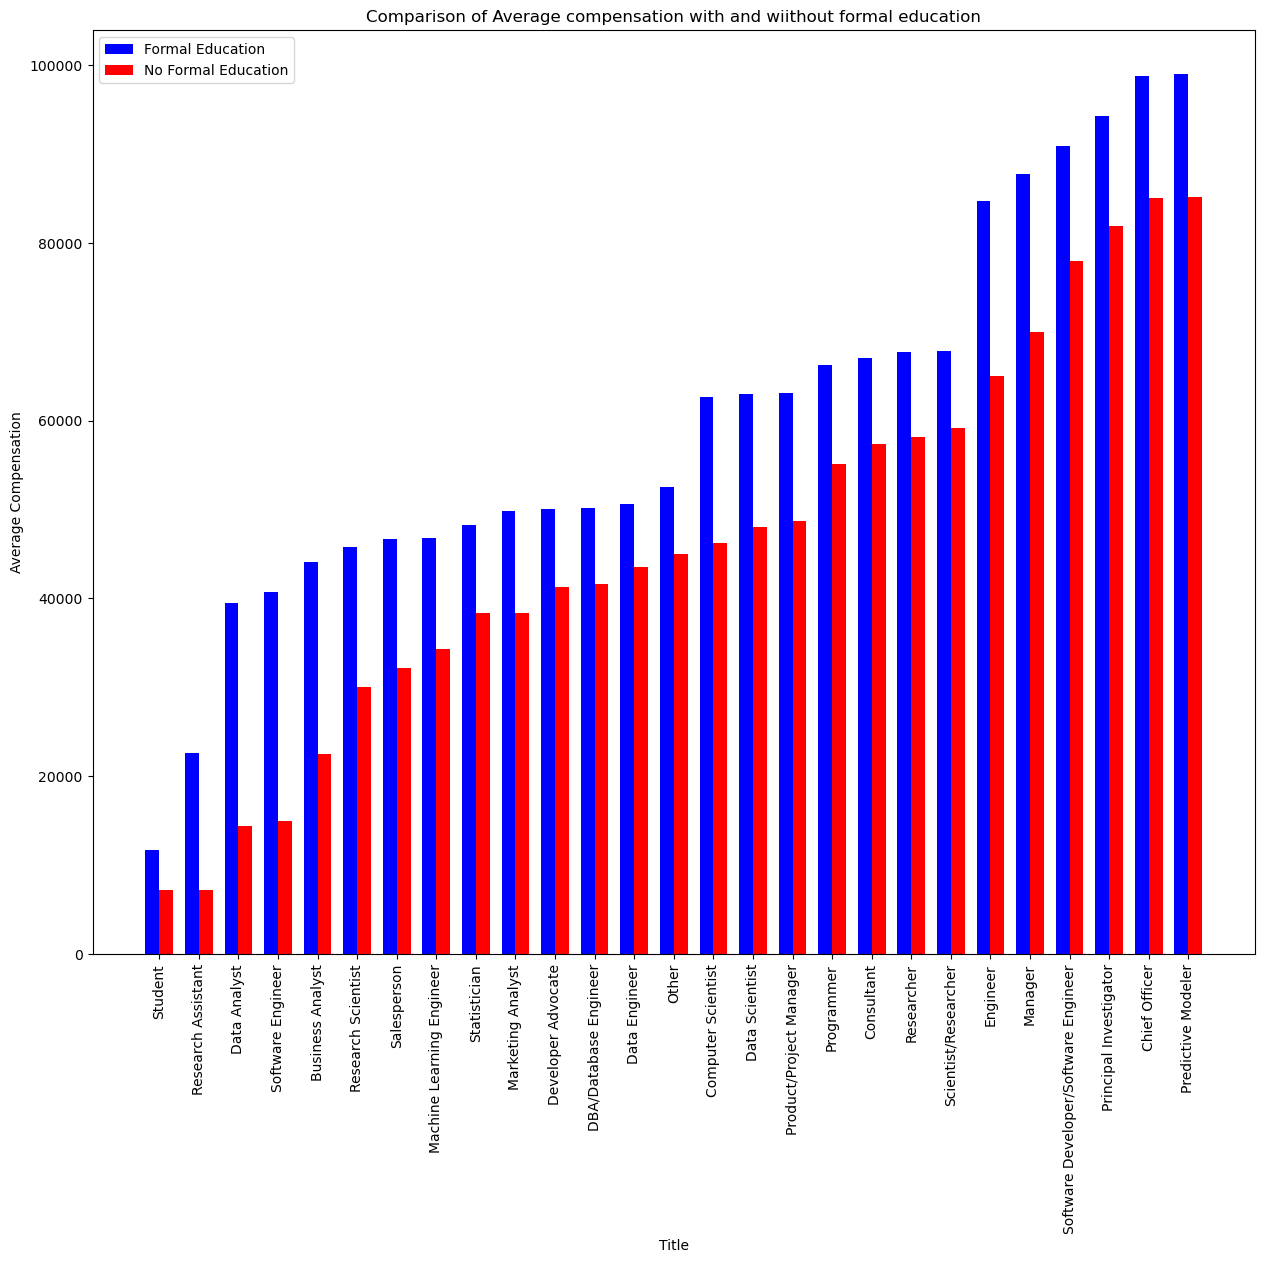

In [66]:
x = np.arange(len(title_df_educ['Job Title']))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(15, 12))

rects1 = ax.bar(x - width/2, title_df_educ['Average Comp'], width, label='Formal Education', color='b')
rects2 = ax.bar(x + width/2, title_df_no_educ['Average Comp'], width, label='No Formal Education', color='r')

# Adding labels and titles
ax.set_xlabel('Title')
ax.set_ylabel('Average Compensation')
ax.set_title('Comparison of Average compensation with and wiithout formal education')
ax.set_xticks(x)
ax.set_xticklabels(title_df_educ['Job Title'])
ax.legend()

# Optional: Add text labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.xticks(rotation = 90)
# Show plot
plt.show()

## Change in salary 

In [67]:
salary_df = filtered_df[['Year', 'Average Comp']]

In [68]:
salary_df.head(20)

,Year,Average Comp
2,2017,25000.5
7,2017,44999.5
12,2017,44999.5
13,2017,54999.5
16,2017,15000.5
20,2017,34999.5
26,2017,112499.5
27,2017,15000.5
28,2017,224999.5
29,2017,64999.5


In [69]:
salary_df = salary_df.groupby(by ='Year').mean().reset_index()

In [70]:
salary_df.head()

,Year,Average Comp
0,2017,86559.148242
1,2018,47179.248283
2,2019,47901.192869
3,2020,41604.267366


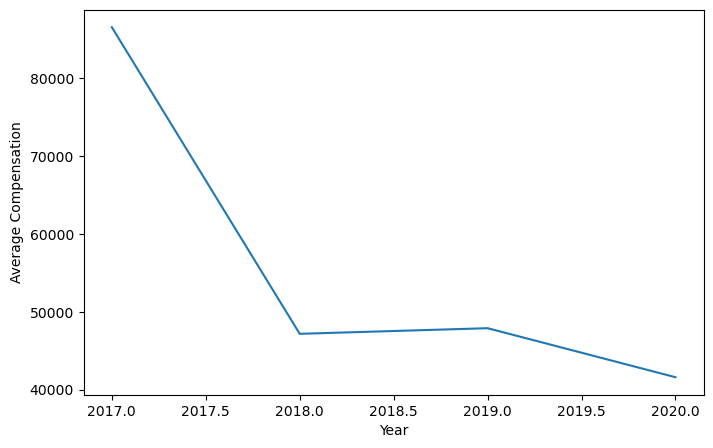

In [71]:
plt.figure(figsize = (8,5))
plt.plot(salary_df['Year'], salary_df['Average Comp'] )
plt.xlabel('Year')
plt.ylabel('Average Compensation')

plt.show()

## Features Analysis

In [104]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43854 entries, 2 to 80325
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                43854 non-null  int64  
 1   Gender                              43854 non-null  object 
 2   Country                             43854 non-null  object 
 3   Degree                              43854 non-null  object 
 4   Job Title                           43854 non-null  object 
 5   Company Size                        43854 non-null  object 
 6   Team Size                           43854 non-null  object 
 7   ML Status in Company                43854 non-null  object 
 8   Money Spent                         43854 non-null  object 
 9   Current role experience (in years)  43854 non-null  object 
 10  Programming language choice         43854 non-null  object 
 11  Recommend Programming language      43854

In [105]:
column_map = {
    'Job Title': 'Job_Title',
    'Company Size': 'Company_Size',
    'Team Size': 'Team_Size',
    'ML Status in Company': 'ML_Status_in_Company',
    'Money Spent': 'Money_Spent',
    'Current role experience (in years)': 'Years_of_Experience',
    'Programming language choice': 'Programming_Language',
    'Coding experience (in years)': 'Coding_Years',
    'TPU Usage': 'TPU_Usage',
    'ML Methods experience (in years': 'ML_Years',
    'Average Age': 'Average_Age',
    'Average Comp': 'Average_Comp',    
}

In [106]:
filtered_df.rename(columns=column_map, inplace=True)

In [179]:
features = filtered_df.columns

In [183]:
columns_to_exclude = ['Average_Comp', 'Year','Average_Age', 'High Range Comp', 'Low Range Comp', 'Gender']

In [184]:
features_clean = [x for x in features if x not in columns_to_exclude]

In [185]:
features_clean

['Country',
 'Degree',
 'Job_Title',
 'Company_Size',
 'Team_Size',
 'ML_Status_in_Company',
 'Money_Spent',
 'Years_of_Experience',
 'Programming_Language',
 'Recommend Programming language',
 'Coding_Years',
 'TPU_Usage',
 'ML Methods experience (in years)']

## One Hot Encoding for Modeling

In [127]:
df_encoded = pd.get_dummies(filtered_df, columns=features_clean, drop_first=True)

In [128]:
df_encoded.head()

,Year,Average_Age,Average_Comp,Gender_Male,Gender_Nonbinary,Gender_Prefer not to say,Gender_Prefer to self-describe,Gender_Unknown / Not Specified,Country_Argentina,Country_Australia,...,ML Methods experience (in years)_2-3 years,ML Methods experience (in years)_20 or more years,ML Methods experience (in years)_20+ years,ML Methods experience (in years)_3-4 years,ML Methods experience (in years)_4-5 years,ML Methods experience (in years)_5-10 years,ML Methods experience (in years)_< 1 years,ML Methods experience (in years)_I do not use machine learning methods,ML Methods experience (in years)_Under 1 year,ML Methods experience (in years)_Unknown / Not Specified
2,2017,25.0,25000.5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,2017,50.0,44999.5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,2017,36.0,500000.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12,2017,27.0,44999.5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13,2017,32.0,54999.5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [130]:
new_columns = df_encoded.columns
features_clean_updated = [col for col in new_columns if col.startswith(tuple(features_clean))]

## ANOVA

In [131]:
filtered_df.columns

Index(['Year', 'Gender', 'Country', 'Degree', 'Job_Title', 'Company_Size',
       'Team_Size', 'ML_Status_in_Company', 'Money_Spent',
       'Years_of_Experience', 'Programming_Language',
       'Recommend Programming language', 'Coding_Years', 'TPU_Usage',
       'ML Methods experience (in years)', 'Average_Age', 'Average_Comp'],
      dtype='object')

In [145]:
for cat_feature in features_clean:
    formula = 'Q("Average_Comp") ~ Q("' + cat_feature + '")'
    model = ols(formula, data=filtered_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(anova_table)

                   sum_sq       df          F        PR(>F)
Q("Gender")  1.616759e+12      5.0  38.440715  1.618605e-39
Residual     3.688363e+14  43848.0        NaN           NaN
                    sum_sq       df          F  PR(>F)
Q("Country")  4.062904e+13     63.0  85.622664     0.0
Residual      3.298240e+14  43790.0        NaN     NaN
                   sum_sq       df          F        PR(>F)
Q("Degree")  2.985724e+12      6.0  59.377193  1.410557e-73
Residual     3.674673e+14  43847.0        NaN           NaN
                      sum_sq       df           F  PR(>F)
Q("Job_Title")  3.445815e+13     30.0  149.809787     0.0
Residual        3.359949e+14  43823.0         NaN     NaN
                         sum_sq       df           F  PR(>F)
Q("Company_Size")  1.681036e+13      7.0  297.744835     0.0
Residual           3.536427e+14  43846.0         NaN     NaN
                      sum_sq       df           F  PR(>F)
Q("Team_Size")  1.422621e+13     12.0  145.902168     0.0
Re

### Potentially irrelevant features - Gender, Programming Language, TPU Usage, Reccomended Programming Language

In [146]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43854 entries, 2 to 80325
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              43854 non-null  int64  
 1   Gender                            43854 non-null  object 
 2   Country                           43854 non-null  object 
 3   Degree                            43854 non-null  object 
 4   Job_Title                         43854 non-null  object 
 5   Company_Size                      43854 non-null  object 
 6   Team_Size                         43854 non-null  object 
 7   ML_Status_in_Company              43854 non-null  object 
 8   Money_Spent                       43854 non-null  object 
 9   Years_of_Experience               43854 non-null  object 
 10  Programming_Language              43854 non-null  object 
 11  Recommend Programming language    43854 non-null  object 
 12  Codi

In [189]:
filtered_df = filtered_df.drop(columns = ['Programming_Language', 'Gender', 'TPU_Usage','Recommend Programming language' ])

In [191]:
df_encoded = pd.get_dummies(filtered_df)

## Recursive Feature Selection

In [192]:
df_encoded = df_encoded.dropna()

In [193]:
target  = df_encoded['Average_Comp']

In [194]:
features = df_encoded[df_encoded['Average_Comp'] != True]

In [195]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [196]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [197]:
cv = StratifiedKFold(n_splits = 5)

In [198]:
feature_numbers = [2]

# Initialize scores list
scores = []

# Loop over feature numbers
for n in feature_numbers:
    rfe = RFE(estimator=model, n_features_to_select=n, step=1)
    rfe.fit(features_train, target_train)
    
    # Define a custom scorer for negative mean squared error
    custom_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    # Calculate cross-validation score using negative mean squared error
    score = cross_val_score(model, rfe.transform(features_train), target_train, cv=cv, scoring=custom_scorer).mean()
    scores.append(score)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(feature_numbers, scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Cross Validation Negative Mean Squared Error')
plt.title("RFE: Score vs Features")
plt.show()

KeyboardInterrupt: 

## Model

In [199]:
from sklearn.dummy import DummyRegressor

In [200]:
ols = LinearRegression()

In [201]:
model = ols.fit(features_train,target_train)

In [202]:
target_predict = model.predict(features_test)

In [203]:
r2 = r2_score(target_test, target_predict)
print("R-squared value of the Linear Regression model without tuning is - ", r2)

R-squared value of the Linear Regression model without tuning is -  1.0


### Baseline model

In [204]:
dummy_r = DummyRegressor(strategy = 'mean')

In [205]:
# Train a baseline model on the training set
dummy_r.fit(features_train, target_train)

DummyRegressor()

In [206]:
# Calculate the score of the baseline model
dummy_r.score(features_test, target_test)

-4.5829841659239534e-05

### Random Forest